# Weather forecasting
Portfolio Project <br>
**Description :**
- call api 
- convert it into dataframe
- analyse the data
- build a model for forecasting

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import requests


## Calling an API and retrieving data

In [4]:
URL = 'https://archive-api.open-meteo.com/v1/archive?latitude=13.09&longitude=80.28&start_date=1980-01-01&end_date=2023-02-28&daily=temperature_2m_max,temperature_2m_min,rain_sum,precipitation_hours&timezone=auto'
data= requests.get(URL)


In [5]:
chennai = data.json()

# creating a dataframe

In [6]:
df=pd.DataFrame(chennai['daily'])
df.head(5)


,time,temperature_2m_max,temperature_2m_min,rain_sum,precipitation_hours
0,1980-01-01,27.4,18.2,0.0,0.0
1,1980-01-02,27.7,19.3,0.0,0.0
2,1980-01-03,27.7,18.7,0.0,0.0
3,1980-01-04,27.3,19.3,0.0,0.0
4,1980-01-05,27.9,22.4,0.0,0.0


In [7]:
df.head(10)

,time,temperature_2m_max,temperature_2m_min,rain_sum,precipitation_hours
0,1980-01-01,27.4,18.2,0.0,0.0
1,1980-01-02,27.7,19.3,0.0,0.0
2,1980-01-03,27.7,18.7,0.0,0.0
3,1980-01-04,27.3,19.3,0.0,0.0
4,1980-01-05,27.9,22.4,0.0,0.0
5,1980-01-06,28.1,21.3,0.0,0.0
6,1980-01-07,28.0,22.2,0.0,0.0
7,1980-01-08,28.3,22.5,0.0,0.0
8,1980-01-09,27.3,21.3,0.3,2.0
9,1980-01-10,27.2,21.0,0.0,0.0


In [8]:
df.tail(10)

,time,temperature_2m_max,temperature_2m_min,rain_sum,precipitation_hours
15755,2023-02-19,29.7,21.2,0.0,0.0
15756,2023-02-20,30.6,19.5,0.0,0.0
15757,2023-02-21,31.1,18.4,0.0,0.0
15758,2023-02-22,30.6,18.8,0.0,0.0
15759,2023-02-23,30.4,18.7,0.0,0.0
15760,2023-02-24,30.3,19.2,0.0,0.0
15761,2023-02-25,30.5,17.9,0.0,0.0
15762,2023-02-26,29.7,18.7,0.0,0.0
15763,2023-02-27,30.9,18.7,0.0,0.0
15764,2023-02-28,30.4,21.5,0.0,0.0


# Getting info about the data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15765 entries, 0 to 15764
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 15765 non-null  object 
 1   temperature_2m_max   15765 non-null  float64
 2   temperature_2m_min   15765 non-null  float64
 3   rain_sum             15765 non-null  float64
 4   precipitation_hours  15765 non-null  float64
dtypes: float64(4), object(1)
memory usage: 615.9+ KB


In [10]:
df.dtypes

time                    object
temperature_2m_max     float64
temperature_2m_min     float64
rain_sum               float64
precipitation_hours    float64
dtype: object

### Changing column name 

In [11]:
df.rename(columns={'temperature_2m_max':'max_temp','temperature_2m_min':'min_temp'},inplace=True)

# Statistical Description

In [12]:
df.describe()

,max_temp,min_temp,rain_sum,precipitation_hours
count,15765.000000,15765.000000,15765.000000,15765.000000
mean,31.840419,24.790301,2.653644,3.538979
std,3.430826,2.759432,8.058042,5.896206
min,21.800000,15.000000,0.000000,0.000000
25%,28.700000,23.000000,0.000000,0.000000
50%,32.000000,25.100000,0.000000,0.000000
75%,34.500000,26.900000,1.600000,5.000000
max,42.500000,31.800000,231.800000,24.000000


## Setting time column as index

changing datatype of time column

In [13]:
df['time']=pd.to_datetime(df['time'])

In [14]:
df.dtypes

time                   datetime64[ns]
max_temp                      float64
min_temp                      float64
rain_sum                      float64
precipitation_hours           float64
dtype: object

In [15]:
df.set_index('time',inplace=True)
df

,max_temp,min_temp,rain_sum,precipitation_hours
time,,,,
1980-01-01,27.4,18.2,0.0,0.0
1980-01-02,27.7,19.3,0.0,0.0
1980-01-03,27.7,18.7,0.0,0.0
1980-01-04,27.3,19.3,0.0,0.0
1980-01-05,27.9,22.4,0.0,0.0
...,...,...,...,...
2023-02-24,30.3,19.2,0.0,0.0
2023-02-25,30.5,17.9,0.0,0.0
2023-02-26,29.7,18.7,0.0,0.0


In [16]:
df.index

DatetimeIndex(['1980-01-01', '1980-01-02', '1980-01-03', '1980-01-04',
               '1980-01-05', '1980-01-06', '1980-01-07', '1980-01-08',
               '1980-01-09', '1980-01-10',
               ...
               '2023-02-19', '2023-02-20', '2023-02-21', '2023-02-22',
               '2023-02-23', '2023-02-24', '2023-02-25', '2023-02-26',
               '2023-02-27', '2023-02-28'],
              dtype='datetime64[ns]', name='time', length=15765, freq=None)

In [17]:
df.columns

Index(['max_temp', 'min_temp', 'rain_sum', 'precipitation_hours'], dtype='object')

In [18]:
df.index.year

Int64Index([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='time', length=15765)

In [19]:
rain=df.groupby([df.index.year,df.index.month])['rain_sum'].sum()
pd.DataFrame(rain)

rain_sum
time time          
1980 1          0.4
     2          0.0
     3          2.8
     4          5.3
     5         37.5
...             ...
2022 10       208.8
     11       399.4
     12       213.5
2023 1          8.0
     2          1.9

[518 rows x 1 columns]

# EDA

Statistical decscription

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
max_temp,15765.0,31.840419,3.430826,21.8,28.7,32.0,34.5,42.5
min_temp,15765.0,24.790301,2.759432,15.0,23.0,25.1,26.9,31.8
rain_sum,15765.0,2.653644,8.058042,0.0,0.0,0.0,1.6,231.8
precipitation_hours,15765.0,3.538979,5.896206,0.0,0.0,0.0,5.0,24.0


Correlation Matrix

<AxesSubplot:>

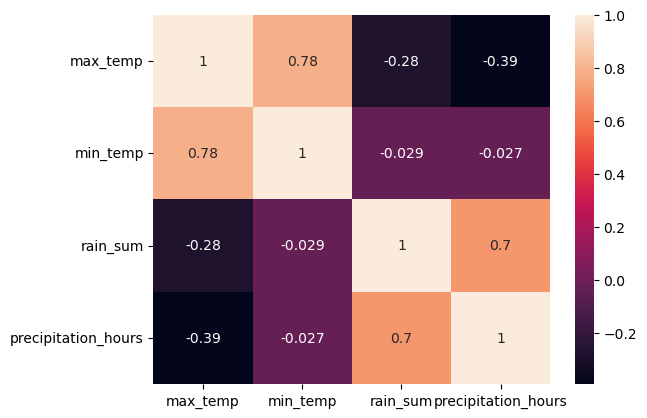

In [21]:
sns.heatmap(df.corr(),annot=True)

Distribution of variables

Distribution of `rainfall`

<AxesSubplot:xlabel='rain_sum'>

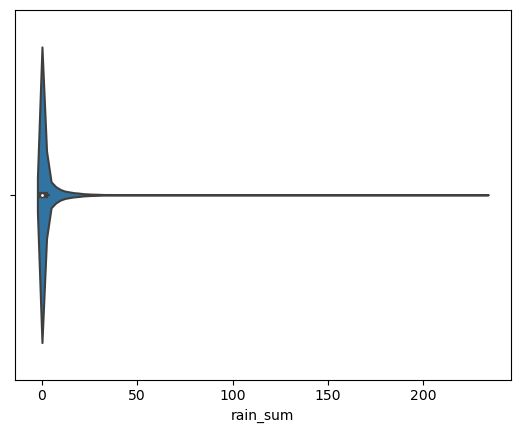

In [22]:
sns.violinplot(x=df.rain_sum)

In [23]:
df.sort_values(by='rain_sum',ascending=False)

,max_temp,min_temp,rain_sum,precipitation_hours
time,,,,
1996-06-14,25.8,25.0,231.8,24.0
2008-11-26,24.9,24.1,151.3,24.0
2016-12-12,24.6,21.7,146.3,24.0
2016-05-17,27.3,26.0,136.4,24.0
1996-06-13,26.0,25.0,131.3,24.0
...,...,...,...,...
1998-12-30,27.0,21.0,0.0,0.0
1998-12-31,26.9,20.8,0.0,0.0
1999-01-01,26.8,21.1,0.0,0.0


Distribution of `maximum_temperature`

<AxesSubplot:xlabel='max_temp', ylabel='Count'>

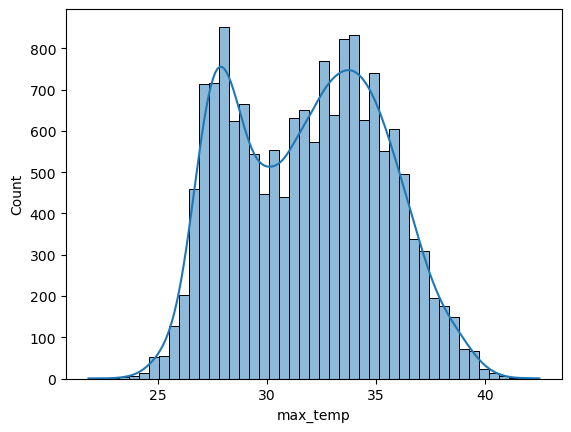

In [24]:
sns.histplot(x=df['max_temp'],kde=True)

Distribution of `minimum_temperature`

In [25]:
sns.histplot(x=df['min_temp']a,kde=True)

SyntaxError: invalid syntax (3597531075.py, line 1)

Jointplot between `minimum temperature` and `maximum temperature`

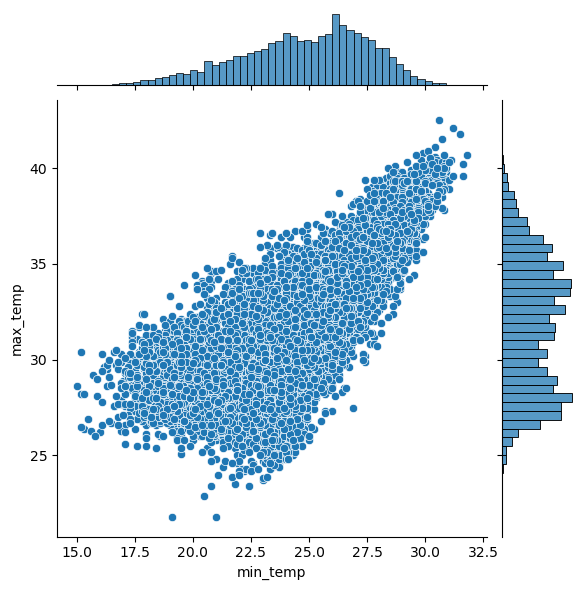

In [26]:
sns.jointplot(x=df['min_temp'],y=df['max_temp'])

This denotes that there exist a positive correlation between them.

Distribution of precipitation Hours

<AxesSubplot:xlabel='precipitation_hours', ylabel='Count'>

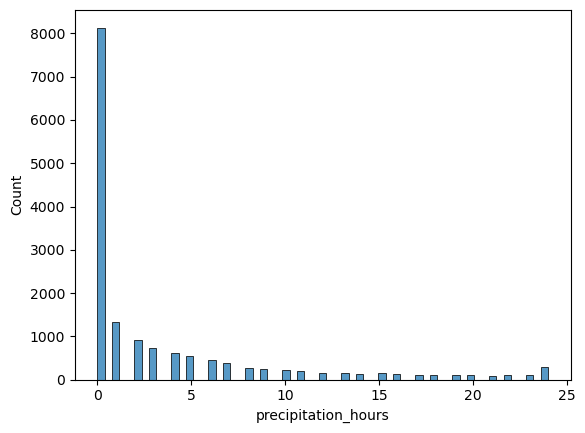

In [27]:
sns.histplot(x=df['precipitation_hours'])

Pairplot between all variables.

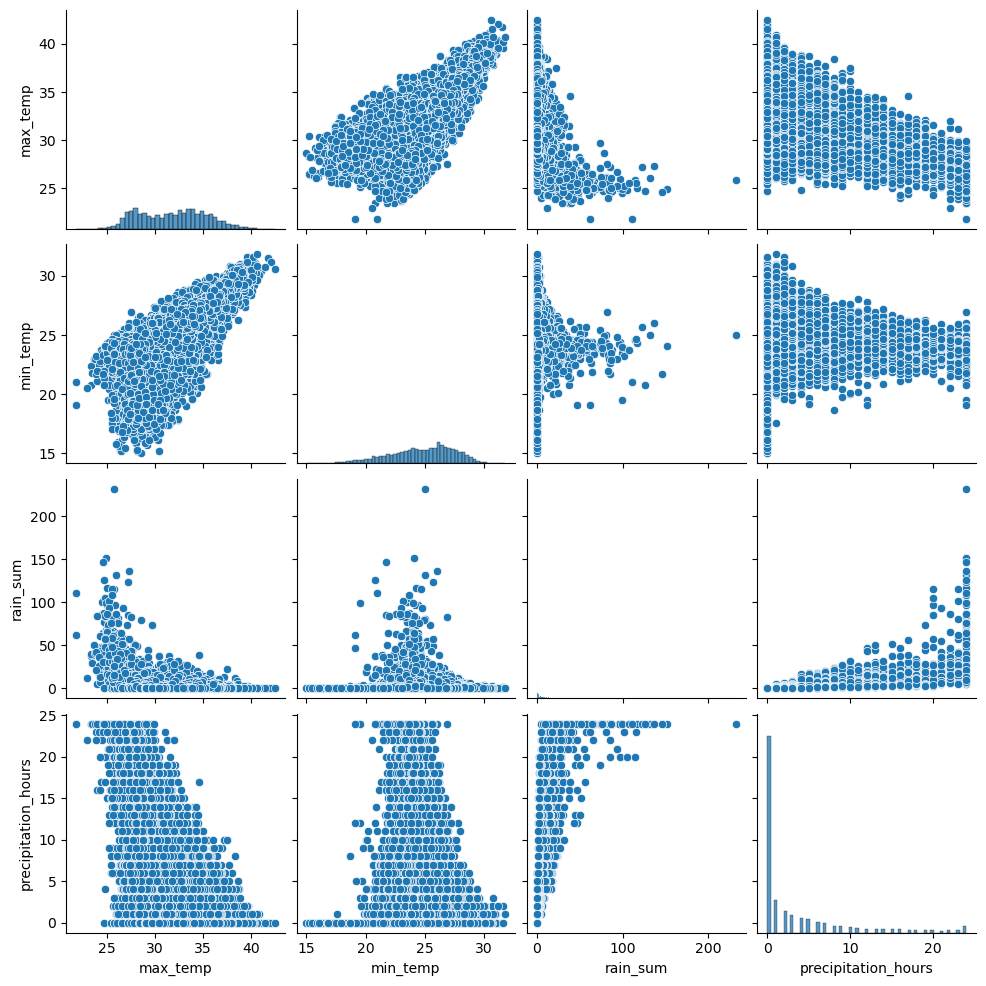

In [28]:
sns.pairplot(df)

Distribution of 

-----
Years with maximum no of rainfall days

<AxesSubplot:xlabel='time'>

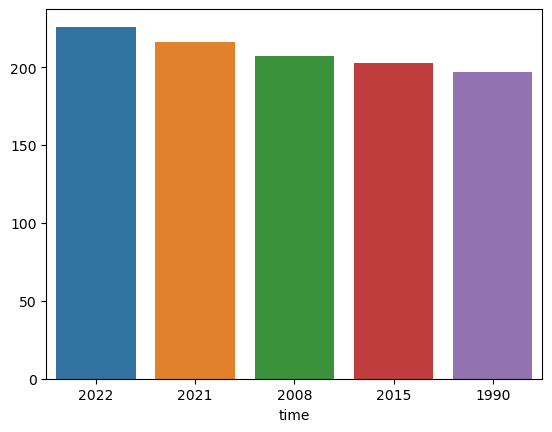

In [29]:
max_day_rain=df[df['rain_sum']!=0.0].groupby(by=df[df['rain_sum']!=0.0].index.year)['rain_sum'].count()
max_day_rain=max_day_rain.sort_values(ascending=False).head()
sns.barplot(x= max_day_rain.index,y=max_day_rain.values,order=max_day_rain.index)

Years with maximum days without rainfall

<AxesSubplot:xlabel='time'>

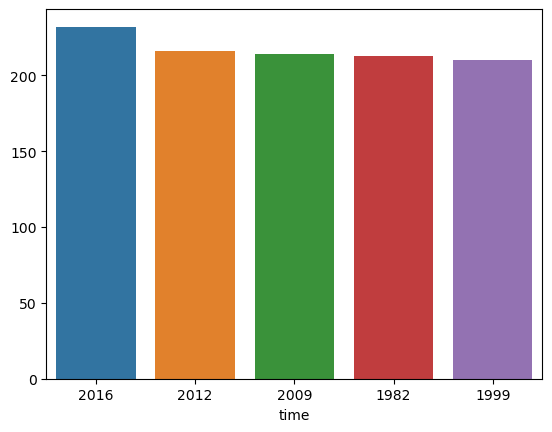

In [30]:
max_day_without_rain=df[df['rain_sum']==0.0].groupby(by=df[df['rain_sum']==0.0].index.year)['rain_sum'].count()
max_day_without_rain=max_day_without_rain.sort_values(ascending=False).head()
sns.barplot(x= max_day_without_rain.index,y=max_day_without_rain.values,order=max_day_without_rain.index)

years with more precipitatiion hours

<AxesSubplot:xlabel='time'>

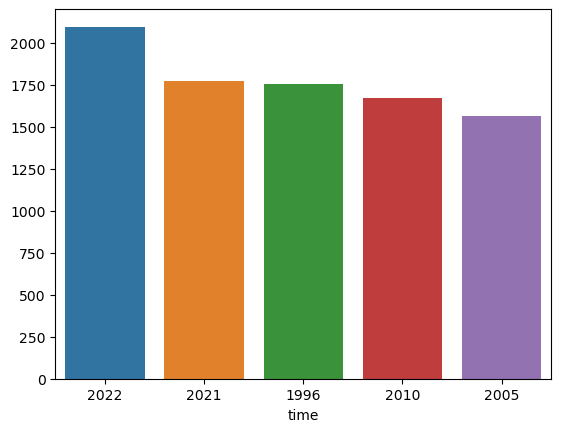

In [31]:
max_precp_hours=df.groupby(df.index.year)['precipitation_hours'].sum()
max_precp_hours=max_precp_hours.sort_values(ascending=False).head()
sns.barplot(x= max_precp_hours.index,y=max_precp_hours.values,order=max_precp_hours.index)

years with less precipitatiion hours

<AxesSubplot:xlabel='time'>

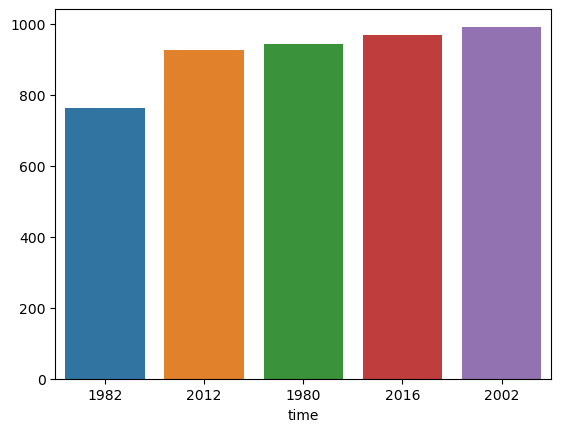

In [32]:
min_precp_hours=df.groupby(df.index.year)['precipitation_hours'].sum()
min_precp_hours=min_precp_hours.loc[:2022].sort_values(ascending=True).head()
sns.barplot(x= min_precp_hours.index,y=min_precp_hours.values,order=min_precp_hours.index)

Years with max total rainfall

<AxesSubplot:xlabel='time'>

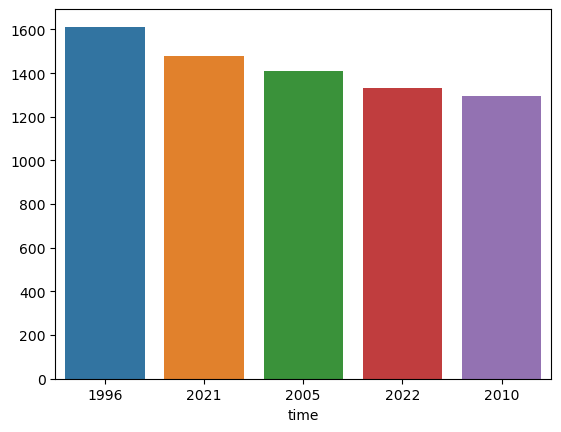

In [33]:
max_rain_sum=df.groupby(df.index.year)['rain_sum'].sum()
max_rain_sum=max_rain_sum.sort_values(ascending=False).head()
sns.barplot(x= max_rain_sum.index,y=max_rain_sum.values,order=max_rain_sum.index)

<AxesSubplot:xlabel='time'>

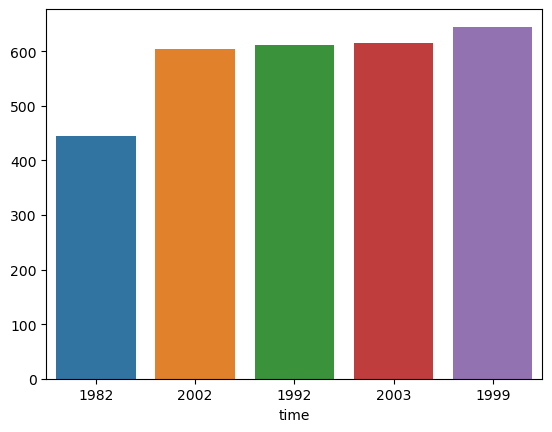

In [34]:
min_rain_sum=df.groupby(df.index.year)['rain_sum'].sum()
min_rain_sum=min_rain_sum.loc[:2022].sort_values().head()
sns.barplot(x= min_rain_sum.index,y=min_rain_sum.values,order=min_rain_sum.index)

In [35]:
r=df.groupby([df.index.month])[['rain_sum','precipitation_hours']].sum().mean

In [36]:
r

<bound method NDFrame._add_numeric_operations.<locals>.mean of       rain_sum  precipitation_hours
time                               
1        876.3               2212.0
2        478.7               1108.0
3        387.6                860.0
4        509.8               1187.0
5       1578.4               1788.0
6       2532.0               3132.0
7       3328.5               4699.0
8       3945.5               5299.0
9       4576.0               6101.0
10      8243.1              10672.0
11     10269.6              11945.0
12      5109.2               6789.0>

In [37]:
r.index

AttributeError: 'function' object has no attribute 'index'

In [ ]:
sns.barplot(x='time',y='precipitation_hours',data=r)

ValueError: Could not interpret input 'time'

Years with max total rainfall

In [ ]:
df[ df['rain_sum']!=0.0].count()

temperature_2m_max     7630
temperature_2m_min     7630
rain_sum               7630
precipitation_hours    7630
dtype: int64

In [ ]:
df[df['rain_sum']==0.0].count()

temperature_2m_max     8135
temperature_2m_min     8135
rain_sum               8135
precipitation_hours    8135
dtype: int64

In [ ]:
df[df['rain_sum']==0.0]

,temperature_2m_max,temperature_2m_min,rain_sum,precipitation_hours
time,,,,
1980-01-01,27.4,18.2,0.0,0.0
1980-01-02,27.7,19.3,0.0,0.0
1980-01-03,27.7,18.7,0.0,0.0
1980-01-04,27.3,19.3,0.0,0.0
1980-01-05,27.9,22.4,0.0,0.0
...,...,...,...,...
2023-02-24,30.3,19.2,0.0,0.0
2023-02-25,30.5,17.9,0.0,0.0
2023-02-26,29.7,18.7,0.0,0.0


In [ ]:
pd.to_datetime(df['sun'])